In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
import pathlib

In [12]:
os.chdir('/content/drive/MyDrive/intern/object_detection')

In [13]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [15]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 26.0 MB/s 
     |████████████████████████████████| 156 kB 60.7 MB/s 
     |████████████████████████████████| 181 kB 50.0 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=9b88a48d74dfc43dcb2a3ad50e6bfefbdccf9742cdb34d06c4f0bb9977ec0e25
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb

wandb.init(project="test-project", entity="agotech")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [17]:
cd yolov5/

/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5


In [ ]:
!python train.py --img 640 --cfg yolov5m.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 60 --data custom_katunda_data.yaml --weights yolov5m.pt --workers 24 --name custom_katunda_v2

wandb: Currently logged in as: tblair24 (agotech). Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=custom_katunda_data.yaml, hyp=hyp.scratch-med.yaml, epochs=60, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=custom_katunda_v2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 71 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup

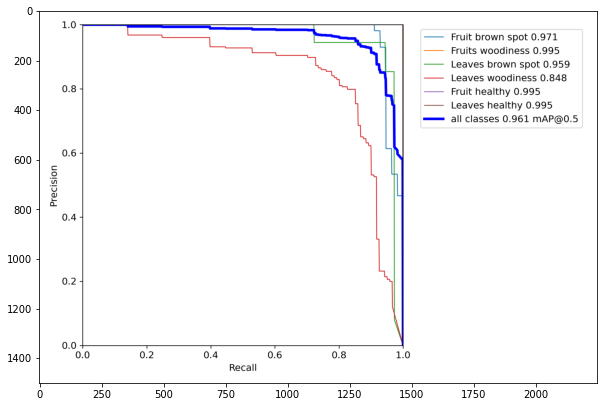

In [ ]:
detections_dir = "runs/train/custom_katunda_v22/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.figure(figsize=(10,10))
plt.imshow(np.array(random_detection_image))



In [ ]:
!python detect.py --source 0  # webcam
                            # file.jpg  # image 
                            # file.mp4  # video
                            # path/  # directory
                            # path/*.jpg  # glob
                            # rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa  # rtsp stream
                            # rtmp://192.168.1.105/live/test  # rtmp stream
                            # http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8  # http stream

# Computing mAP on test dataset

In [ ]:
!python val.py --weights runs/train/custom_katunda_v22/weights/best.pt --data custom_katunda_data.yaml --task test --name katunda_val_v2

val: data=/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5/data/custom_katunda_data.yaml, weights=['runs/train/custom_katunda_v22/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=katunda_val_v2, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs
100% 755k/755k [00:00<00:00, 107MB/s]
test: Scanning '/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5/../custom_katunda_data/labels/test.cache' images and labels... 183 found, 0 missing, 0 empty, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
               Class     Images     L

In [18]:
!python val.py --weights runs/train/custom_katunda_v22/weights/best.pt --data custom_katunda_data.yaml --task test --name katunda_val_v2

val: data=/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5/data/custom_katunda_data.yaml, weights=['runs/train/custom_katunda_v22/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.8, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=katunda_val_v2, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning '/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5/../custom_katunda_data/labels/test.cache' images and labels... 183 found, 0 missing, 0 empty, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5

In [19]:
!python export.py --weights runs/train/custom_katunda_v22/weights/best.pt --data custom_katunda_data.yaml --include tflite

export: data=custom_katunda_data.yaml, weights=['runs/train/custom_katunda_v22/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5m summary: 290 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs

PyTorch: starting from runs/train/custom_katunda_v22/weights/best.pt with output shape (1, 25200, 11) (40.3 MB)

TensorFlow SavedModel: starting export with tensorflow 2.8.2...

                 from  n    params  module                                  arguments                     
2022-09-30 09:47:42.223943: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable devi

In [23]:
!python detect.py --weights runs/train/custom_katunda_v22/weights/best-fp16.tflite --source /content/drive/MyDrive/intern/object_detection/test_images/20200205_155457.jpg --data /content/drive/MyDrive/intern/object_detection/yolov5/data/custom_katunda_data.yaml

detect: weights=['runs/train/custom_katunda_v22/weights/best-fp16.tflite'], source=/content/drive/MyDrive/intern/object_detection/test_images/20200205_155457.jpg, data=/content/drive/MyDrive/intern/object_detection/yolov5/data/custom_katunda_data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Loading runs/train/custom_katunda_v22/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/1 /content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/test_images/20200205_155457.jpg: 640x640 1